In [1]:
# W train
# average AM enters / exits

In [2]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [3]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [5]:
# look at W line only
W_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('W')]

In [6]:
# look at all station names
W_train_all['STATION'].unique()

array(['14 ST-UNION SQ', '23 ST', '28 ST', '30 AV', '34 ST-HERALD SQ',
       '36 AV', '42 ST-PORT AUTH', '49 ST', '5 AV/59 ST', '57 ST-7 AV',
       '59 ST', '8 ST-NYU', 'ASTORIA BLVD', 'ASTORIA DITMARS', 'CANAL ST',
       'CITY HALL', 'CORTLANDT ST', 'PRINCE ST', 'QUEENSBORO PLZ',
       'RECTOR ST', 'SOUTH FERRY', 'TIMES SQ-42 ST', 'WHITEHALL S-FRY'],
      dtype=object)

In [7]:
# check station count
W_train_all['STATION'].count()

28

In [9]:
# clean station names
# needs further cleaning
W_train_all["STATION"].replace("SOUTH FERRY", value="WHITEHALL S-FRY", inplace=True)
W_train_all["STATION"].replace("42 ST-PORT AUTH", value="TIMES SQ-42 ST", inplace=True)

In [10]:
# now sum same name rows
W_commuters = W_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
W_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
14 ST-UNION SQ,17962.0,48134.0
23 ST,982.0,2788.0
28 ST,623.0,3079.0
30 AV,6376.0,1530.0
34 ST-HERALD SQ,14027.0,21487.0


In [11]:
# order stations in excel
# save as csv
W_commuters.to_csv('W_commuters.csv')

In [13]:
# open ordered CSV
csv_path_W = 'W_commuters_order.csv'
W_commuters_order = pd.read_csv(csv_path_W, encoding="utf-8")
W_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,ASTORIA DITMARS,13218,1005
1,ASTORIA BLVD,5115,1111
2,30 AV,6376,1530
3,36 AV,3598,1718
4,QUEENSBORO PLZ,2983,1833


In [14]:
W_commuters_order['AM_AVG_ENTER'] = W_commuters_order['AM_ENTERS']/5

In [15]:
W_commuters_order['AM_AVG_EXIT'] = W_commuters_order['AM_EXITS']/5
W_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,ASTORIA DITMARS,13218,1005,2643.6,201.0
1,ASTORIA BLVD,5115,1111,1023.0,222.2
2,30 AV,6376,1530,1275.2,306.0
3,36 AV,3598,1718,719.6,343.6
4,QUEENSBORO PLZ,2983,1833,596.6,366.6


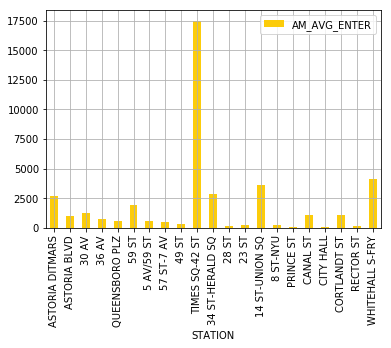

In [16]:
# graph W Train AM AVG ENTERS
plt = W_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#FCCC0A')
plt.grid()

# save the fig
plt.figure.savefig('W-AM-enter.pdf')

In [17]:
# order stations in excel
# save as csv
W_commuters_order.to_csv('W_commuters_final.csv')

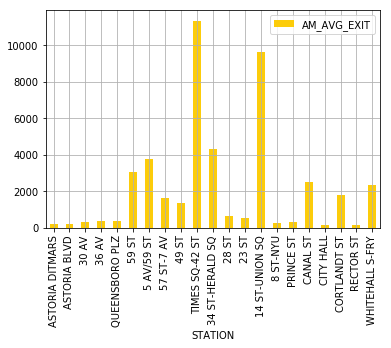

In [18]:
# graph W Train AM AVG EXITS
plt = W_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#FCCC0A')
plt.grid()

# save the figa
plt.figure.savefig('W-AM-exit.pdf')